<a href="https://colab.research.google.com/github/LeeJaeEun0/Study_ML_DL/blob/main/Students_Performance_in_Exams_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학생의 성적 예측하기

## import 및 데이터 확인

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/student/StudentsPerformance.csv')
train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
train.info() # object 5개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
train.describe() 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
train.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [ ]:
train.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [ ]:
train.isnull().sum() # 결측치는 없음

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 데이터 시각화

In [ ]:
palette = sns.color_palette("flare")

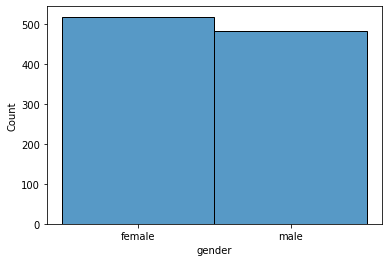

In [ ]:
sns.histplot(data=train, x='gender', palette=palette)

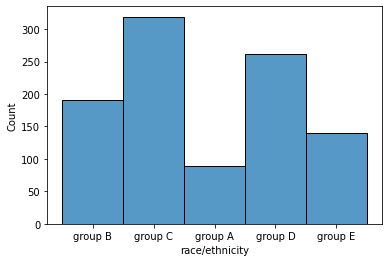

In [ ]:
sns.histplot(data=train, x='race/ethnicity')

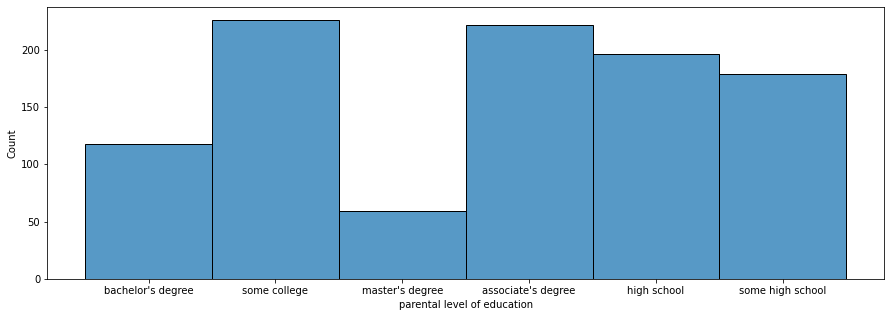

In [ ]:
fig=plt.figure(figsize=(15,5))
sns.histplot(data=train, x='parental level of education')

In [ ]:
train['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

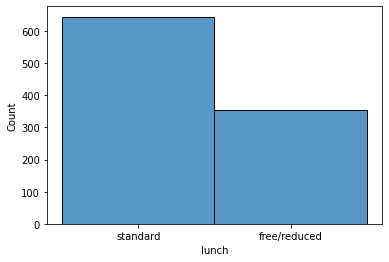

In [ ]:
sns.histplot(data=train, x='lunch')

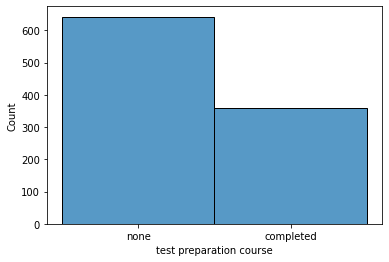

In [ ]:
sns.histplot(data=train, x='test preparation course')

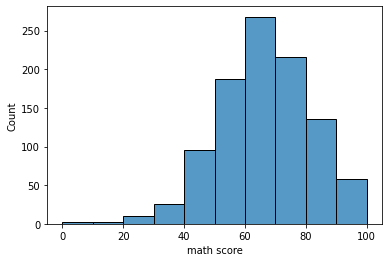

In [ ]:
sns.histplot(data=train, x='math score', bins=10)

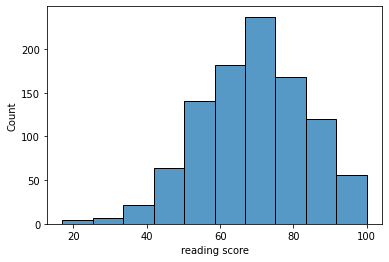

In [ ]:
sns.histplot(data=train, x='reading score', bins=10)

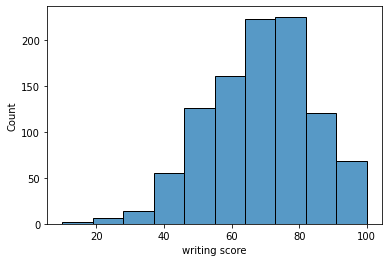

In [ ]:
sns.histplot(data=train, x='writing score', bins=10)

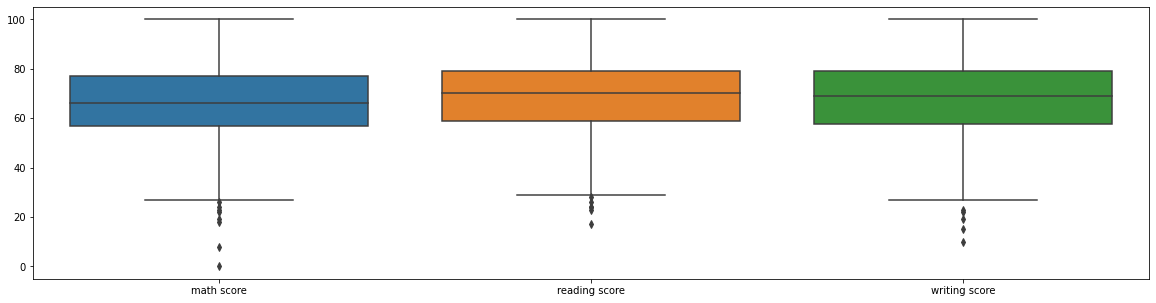

In [ ]:
#전체적인 
plt.figure(figsize=(20,5))
sns.boxplot(data=train)
plt.show()

In [ ]:
train['math score'].value_counts()

65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64

In [ ]:
train['reading score'].value_counts()

72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64

In [ ]:
train['writing score'].value_counts()

74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: writing score, Length: 77, dtype: int64

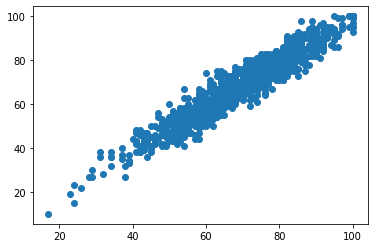

In [ ]:
plt.scatter(train['reading score'],train['writing score'])

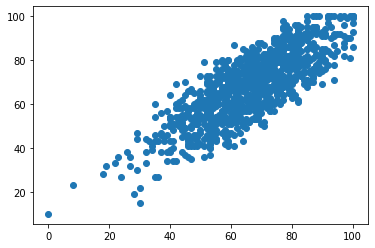

In [ ]:
plt.scatter(train['math score'],train['writing score'])

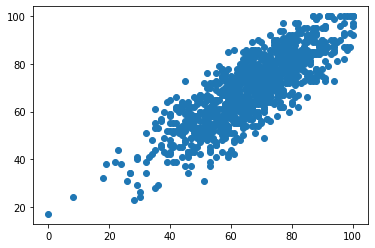

In [ ]:
plt.scatter(train['math score'],train['reading score'])

## 데이터 전처리

### 원-핫 인코딩

In [ ]:
train = pd.get_dummies(train, columns=['race/ethnicity', 'gender','lunch','test preparation course'], drop_first=True)
train = pd.get_dummies(train, columns=['parental level of education'])

In [ ]:
train.head()

,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_male,lunch_standard,test preparation course_none,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,72,72,74,1,0,0,0,0,1,1,0,1,0,0,0,0
1,69,90,88,0,1,0,0,0,1,0,0,0,0,0,1,0
2,90,95,93,1,0,0,0,0,1,1,0,0,0,1,0,0
3,47,57,44,0,0,0,0,1,0,1,1,0,0,0,0,0
4,76,78,75,0,1,0,0,1,1,1,0,0,0,0,1,0


## 아웃라이어 처리하기

In [ ]:
train = train[(train['math score'] >= 40)]
train = train[(train['reading score'] >= 40)]
train = train[(train['writing score'] >= 40)]

## 3과목의 총점을 구하기

In [ ]:
train['total'] = train['math score'] + train['reading score']+ train['writing score']

## 선형 회귀

### 학습하기

In [ ]:
# 독립 변수
X = train.drop(['math score','reading score','writing score','total'], axis=1)
# 종속변수
y = train['total']
X,y

(     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
 0                         1                       0                       0   
 1                         0                       1                       0   
 2                         1                       0                       0   
 3                         0                       0                       0   
 4                         0                       1                       0   
 ..                      ...                     ...                     ...   
 995                       0                       0                       0   
 996                       0                       1                       0   
 997                       0                       1                       0   
 998                       0                       0                       1   
 999                       0                       0                       1   
 
      race/ethnicity_group E  gender_m

### 훈련하기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

### 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
pred

array([184.  , 218.25, 193.  , 209.5 , 207.5 , 216.5 , 207.5 , 200.75,
       187.75, 207.5 , 239.75, 218.25, 216.5 , 202.  , 236.5 , 206.75,
       225.25, 202.25, 220.5 , 241.75, 238.  , 190.5 , 228.  , 208.5 ,
       214.75, 207.5 , 190.5 , 208.5 , 199.  , 214.25, 201.25, 222.  ,
       221.75, 212.25, 236.5 , 195.75, 201.5 , 196.75, 243.75, 230.75,
       193.75, 204.75, 228.  , 220.25, 190.5 , 213.25, 182.  , 195.  ,
       210.5 , 184.  , 238.  , 206.75, 230.25, 229.25, 183.25, 223.5 ,
       204.75, 216.75, 229.25, 188.5 , 228.25, 201.  , 184.  , 211.  ,
       198.25, 178.25, 214.75, 203.75, 180.75, 218.25, 203.  , 198.  ,
       202.  , 237.5 , 223.  , 228.75, 202.25, 190.5 , 201.25, 207.5 ,
       227.5 , 203.75, 212.25, 202.25, 203.25, 201.25, 190.5 , 225.75,
       226.5 , 201.25, 217.25, 214.25, 217.25, 207.75, 212.25, 204.5 ,
       212.  , 237.5 , 214.25, 223.  , 234.5 , 187.75, 210.5 , 212.  ,
       190.25, 213.25, 199.25, 200.75, 201.25, 203.75, 203.25, 214.75,
      

### 평가하기

In [ ]:
comparison = pd.DataFrame({
    'actual': y_test, # 실제값
    'pred': pred
}) 
comparison

,actual,pred
453,172,184.00
543,266,218.25
108,198,193.00
510,220,209.50
477,220,207.50
...,...,...
748,169,202.25
282,236,208.50
322,232,214.25
378,231,197.25


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# mes
# mean_squared_error(y_test, pred)
pred_train = model.predict(X_train)
mean_squared_error(y_train, pred_train, squared=False)

33.28688628302402

In [ ]:
# rmse
mean_squared_error(y_test, pred, squared=False)

34.61467877710416

In [ ]:
# # rmse
# mean_squared_error(y_test, pred, squared=)

In [ ]:
model.score(X_test, y_test)

0.27854655809265016

## XGBoost

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split

# 독립 변수
X = train.drop(['math score','reading score','writing score','total'], axis=1)
# 종속변수
y = train['total']
X,y

(     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
 0                         1                       0                       0   
 1                         0                       1                       0   
 2                         1                       0                       0   
 3                         0                       0                       0   
 4                         0                       1                       0   
 ..                      ...                     ...                     ...   
 995                       0                       0                       0   
 996                       0                       1                       0   
 997                       0                       1                       0   
 998                       0                       0                       1   
 999                       0                       0                       1   
 
      race/ethnicity_group E  gender_m

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(random_state=11)

In [ ]:
model.fit(X_train, y_train)

[11:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=11)

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
# mes
# mean_squared_error(y_test, pred)
pred_train = model.predict(X_train)
mean_squared_error(y_train, pred_train, squared=False)

31.86008258325095

In [ ]:
# rmse
mean_squared_error(y_test, pred, squared=False)

34.61467877710416

In [ ]:
model.score(X_test, y_test) # ?

0.22177178237523654